In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/digits.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


图片大小：28*28

In [3]:
train = data.iloc[:,1:]
target = data['label']

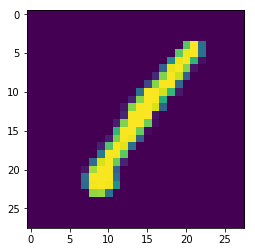

In [5]:
plt.imshow(train.loc[0].values.reshape(28,28))

In [4]:
train.shape

(42000, 784)

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
# 数据量太大了，弄的小一点
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2)

In [5]:
train_num,test_num = 5000,200
X_train = train[:train_num]
y_train = target[:train_num]
X_test = train[-test_num:]
y_test = target[-test_num:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()
%time knn.fit(X_train,y_train)

Wall time: 1.94 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
%time knn.predict(X_test)

Wall time: 48 s


array([2, 3, 9, ..., 7, 6, 9], dtype=int64)

In [29]:
%time knn.score(X_test,y_test)

Wall time: 50.7 s


0.955

In [7]:
# 做降维分析
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
# pca = PCA(n_components=100)
# train_pca = pca.fit_transform(X_train)

lda = LinearDiscriminantAnalysis(n_components=9)
train_lda = lda.fit_transform(X_train,y_train)

d:\python3.6\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
train_lda.shape

(5000, 9)

In [14]:
knn = KNeighborsClassifier()
knn.fit(train_lda,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
test_lda = lda.transform(X_test)
%time knn.score(test_lda,y_test)

Wall time: 12.5 ms


0.875